<a href="https://colab.research.google.com/github/dantevangelista/Wine-with-ML/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import tensorflow as tf
import keras
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import classification_report as class_report

## Dataset

[1] Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

In [2]:
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality", "color"]
rDF = pd.read_csv("winequality-red.csv", sep = ";", names=columns)
rDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
wDF = pd.read_csv("winequality-white.csv", sep = ";", names=columns)
wDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [4]:
df = pd.concat([rDF, wDF], axis=0)
df["color"] = (df["color"]=="red").astype(int)
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## Probability Plots

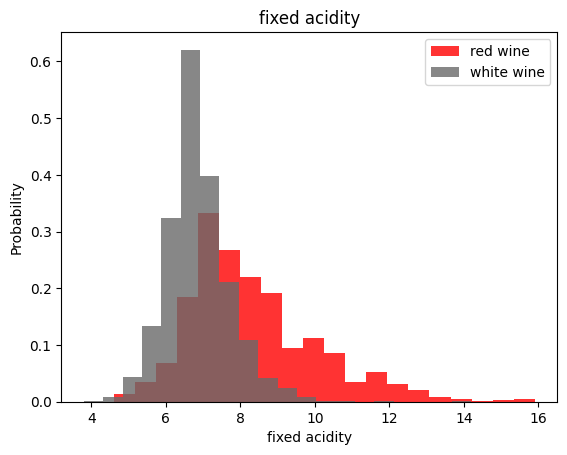

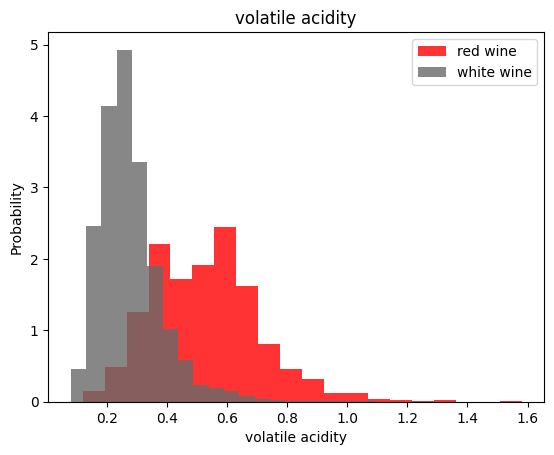

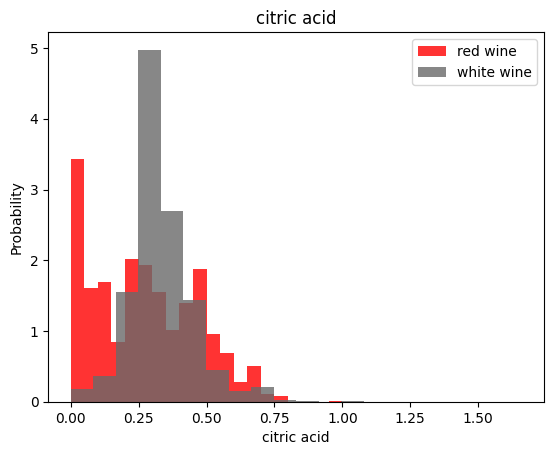

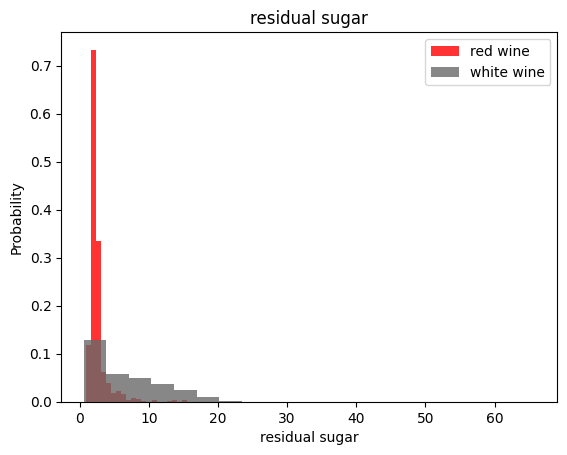

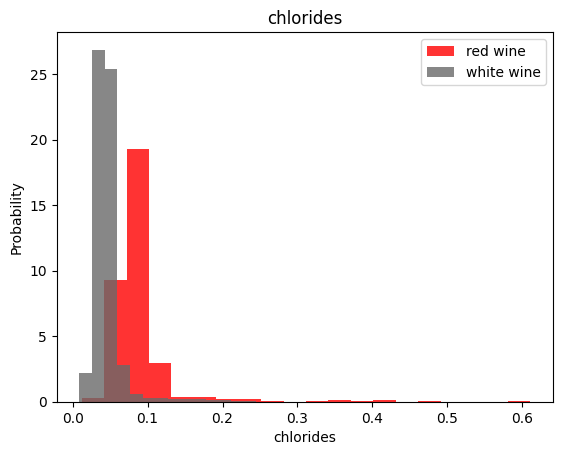

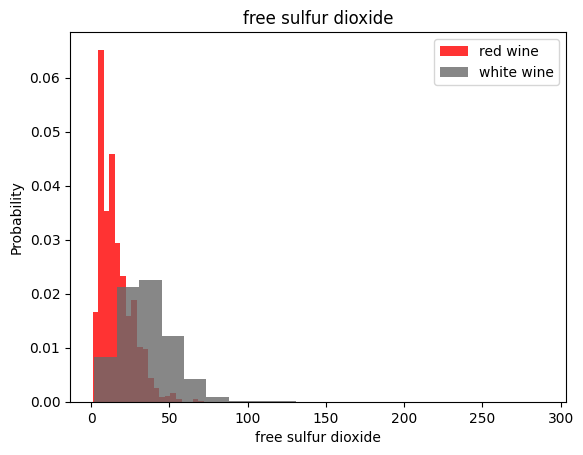

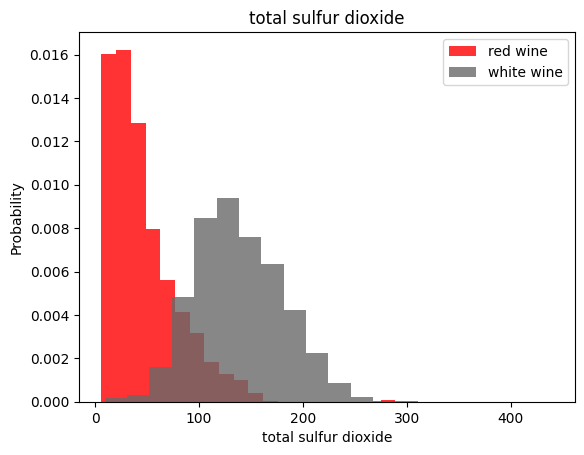

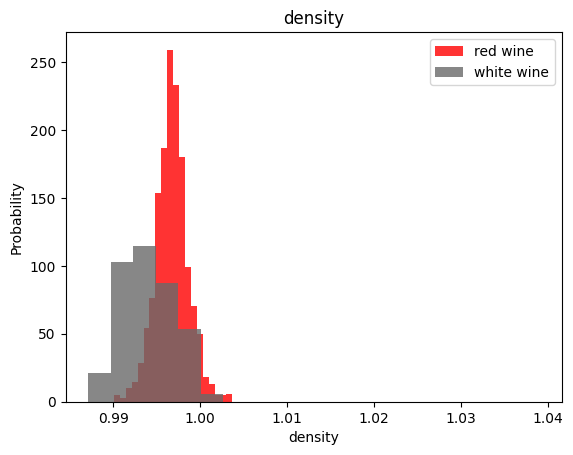

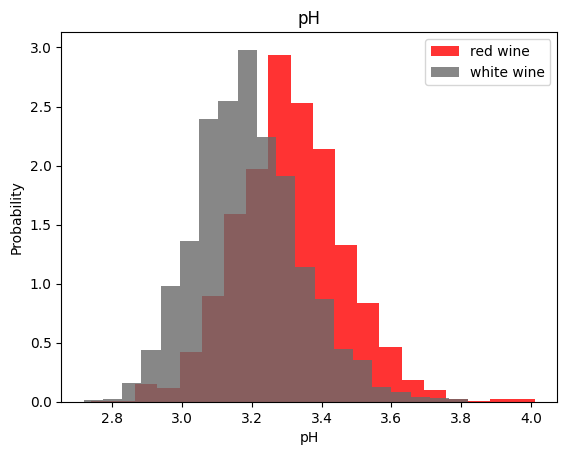

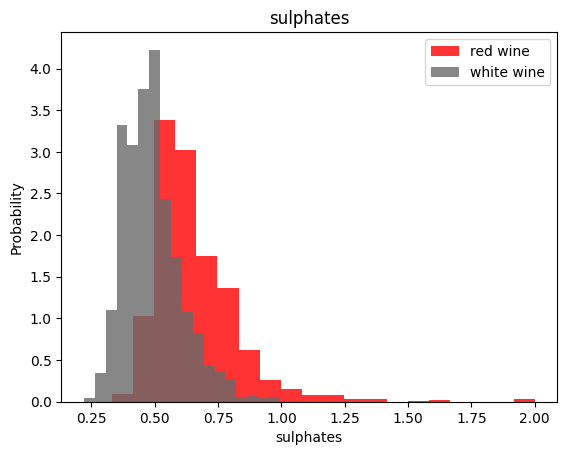

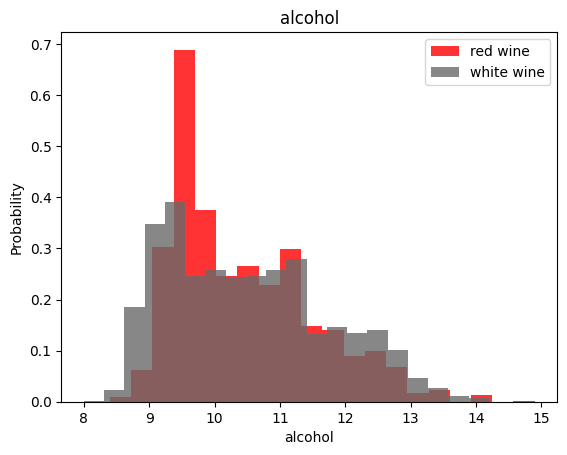

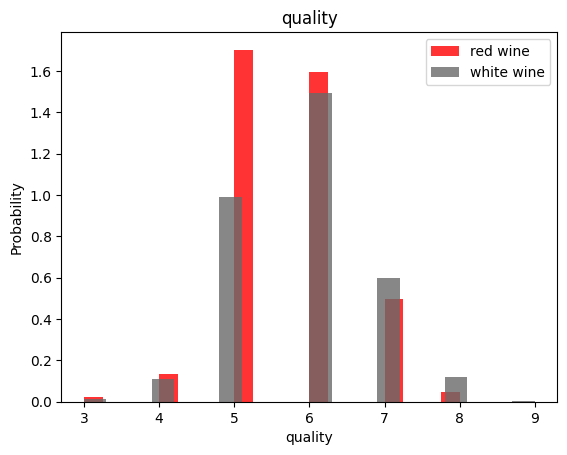

In [5]:
for label in columns[:-1]:
  plt.hist(df[df["color"]==1][label], label="red wine", color="red", bins=20, alpha=0.8, density=True)
  plt.hist(df[df["color"]==0][label], label="white wine", color="dimgrey", bins=20, alpha=0.8, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Scatterplots

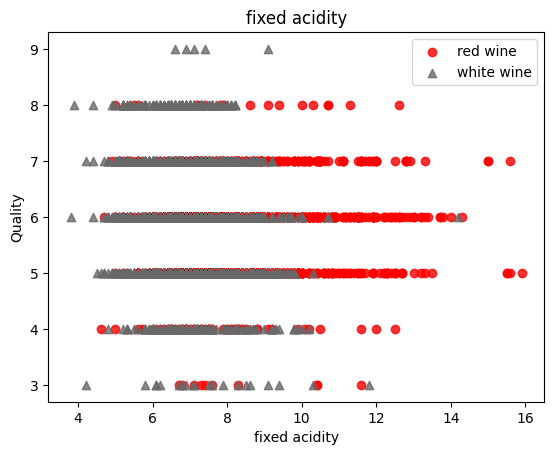

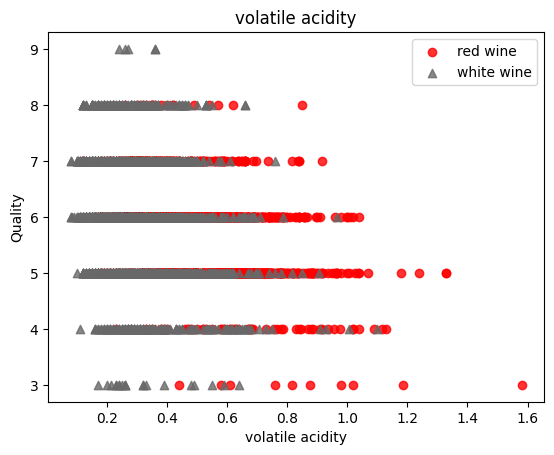

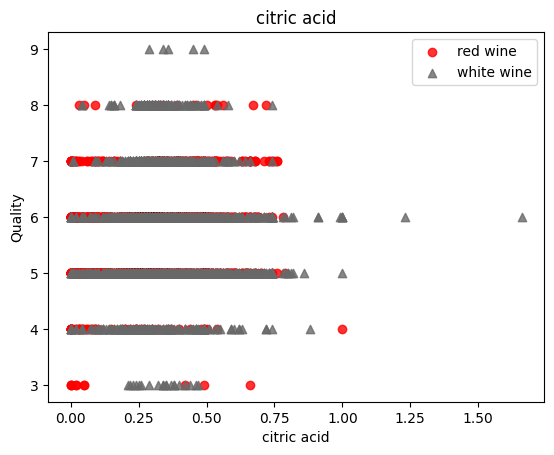

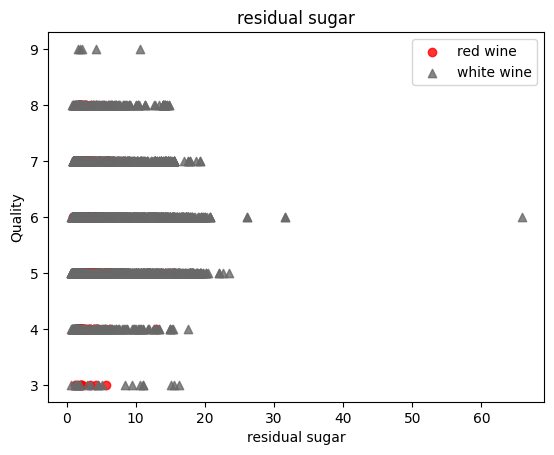

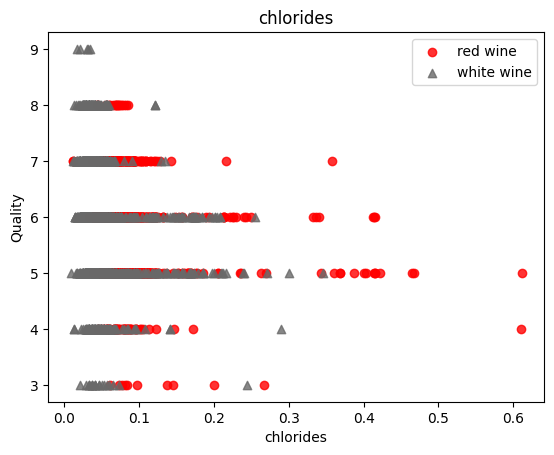

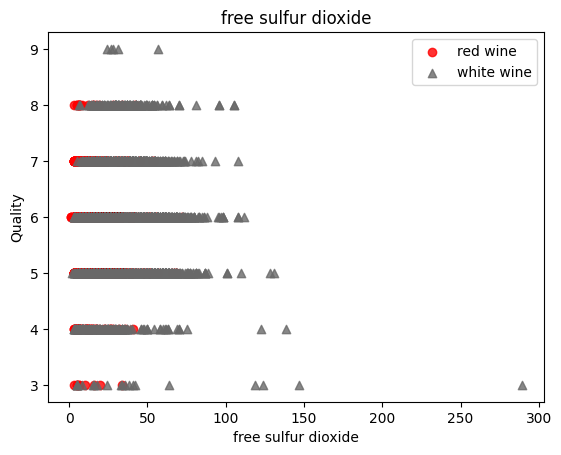

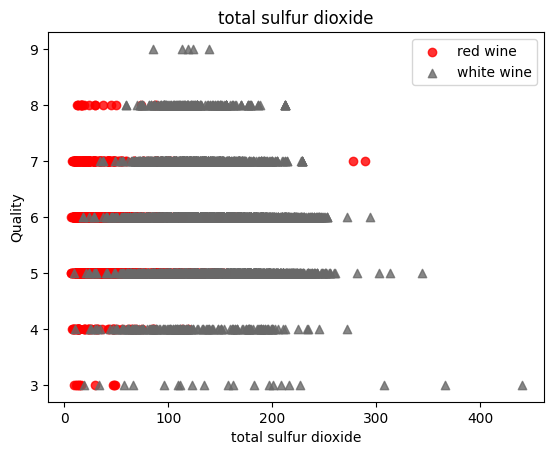

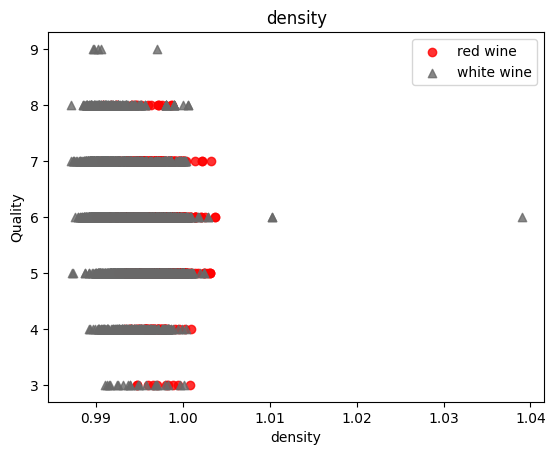

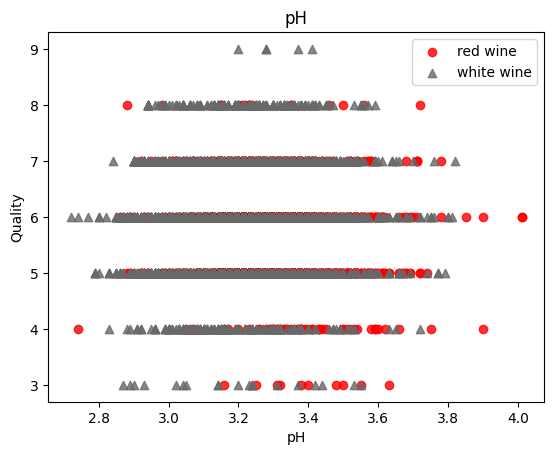

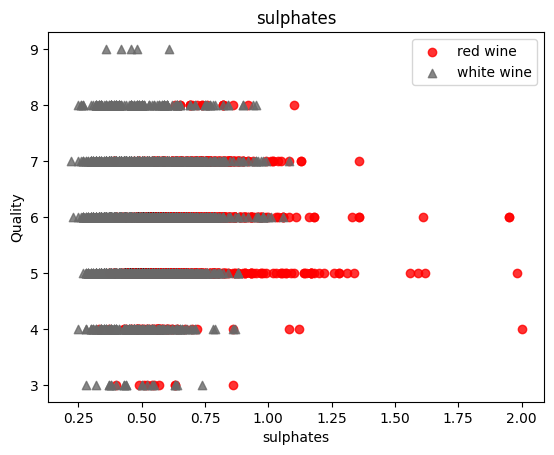

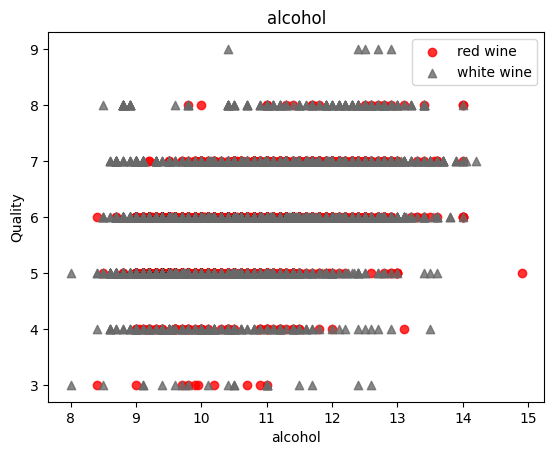

In [6]:
for label in df.columns[:-1]:
  if label != "quality":
    plt.scatter(df[df["color"]==1][label], df[df["color"]==1]["quality"], label="red wine", color="red", alpha=0.8)
    plt.scatter(df[df["color"]==0][label], df[df["color"]==0]["quality"], label="white wine", marker="^", color="dimgrey", alpha=0.8)
    plt.title(label)
    plt.ylabel("Quality")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, Valid, Test Datasets

In [7]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


*Note dataframe shuffled before split

## Preprocessing

In [8]:
def scale_dataset(dataframe, y_label):
  dataframe = copy.deepcopy(dataframe)
  # z = (x - u) / s
  # z: new value
  # x: value
  # u: mean
  # s: standard deviation
  scaler = StandardScaler()
  X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  y = dataframe[y_label].values

  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

## Scaled Train, Valid, Test Datasets


In [9]:
train, X_train, y_train = scale_dataset(train, "quality")
val, X_val, y_val = scale_dataset(val, "quality")
test, X_test, y_test = scale_dataset(test, "quality")

## Logistic Regression

Probability:

$ln(\frac{p}{1-p}) = mx+b$

$\frac{p}{1-p} = e^{mx+b}$

$p = e^{mx+b} - pe^{mx+b}$

$p(1+e^{mx+b}) = e^{mx+b}$

$p = \frac{e^{mx+b}}{1 + e^{mx+b}} * \frac{e^{-(mx+b)}}{e^{-(mx+b)}}$

$p = \frac{1}{1 + e^{-(mx+b)}} = S(mx+b)$

\\

Sigmoid Function:

$\sigma(a) = \frac{1}{1+e^{-a}}$

\\

Simple Logistic Regression: $x_0$


Multiple Logisitic Regression: $x_0, x_1, ..., x_n$

In [10]:
lgrModel = LogReg(max_iter=200)
y_pred = lgrModel.fit(X_train, y_train).predict(X_test)
print(class_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       1.00      0.04      0.08        49
           5       0.59      0.60      0.60       427
           6       0.52      0.68      0.59       575
           7       0.48      0.25      0.33       214
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00         0

    accuracy                           0.54      1300
   macro avg       0.37      0.23      0.23      1300
weighted avg       0.54      0.54      0.51      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Naive Bayes

Bayes' Rule

$P(C_k|x) = \frac{P(x|C_k)P(C_k)}{P(x)}$

$x$: feature vector

$P(C_k|x)$: posterior

$P(x|C_k)$: likelihood

$P(C_k)$: prior

$P(x)$: evidence

\\

Naive Bayes

Assume: all variables independent

Derivation:

$P(C_k|x_1, x_2, ..., x_n) = \frac{P(x_1, x_2, ..., x_n|C_k) * P(C_k)}{P(x_1, x_2, ..., x_n)}$

\\

$P(x_1,x_2,...,x_n)$ is constant

\\

$P(C_k|x_1, x_2, ..., x_n) \:\alpha\: P(x_1, x_2, ..., x_n|C_k) * P(C_k)$

$P(C_k|x_1, x_2, ..., x_n) \:\alpha\: P(C_k)*[P(x_1|C_k)*P(x_2|C_k)*...*P(x_n|C_k)]$

\\

$P(C_k|x_1, x_2, ..., x_n)\:\alpha\:P(C_k) ∏_{i=1}^n P(x_i|C_k)$

$\alpha$: proportional to

\\
$\hat{y}$: (predicted y)

$\hat{y} = argmax_{k \in \{1,k\}} P(C_k) \prod_{i=1}^n P(x_i|C_k)$

MAP: Maximum A Posteriori


\\

[2] Zhang, H. (2004). The optimality of naive Bayes. Aa, 1(2), 3.

In [11]:
gnbModel = GaussianNB()
y_pred = gnbModel.fit(X_train, y_train).predict(X_test)
print(class_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.20      0.20      0.20         5
           4       0.16      0.08      0.11        49
           5       0.51      0.55      0.53       427
           6       0.49      0.39      0.44       575
           7       0.32      0.44      0.37       214
           8       0.11      0.23      0.15        30

    accuracy                           0.43      1300
   macro avg       0.30      0.32      0.30      1300
weighted avg       0.45      0.43      0.44      1300



## Support Vector Machine (SVM)

Support Vector Machine (SVM): hyperplane that divides 2 classes

*not best model if outliers

Margin: want to maximize margins

Support Vectors: data pts that lie on margin

kernal trick: projecting data onto antoher dimension e.g. $x \rightarrow (x,x^2)$

In [12]:
svmModel = SVC()
y_pred = svmModel.fit(X_train, y_train).predict(X_test)
print(class_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        49
           5       0.61      0.62      0.62       427
           6       0.54      0.72      0.61       575
           7       0.57      0.25      0.35       214
           8       0.00      0.00      0.00        30

    accuracy                           0.56      1300
   macro avg       0.29      0.27      0.26      1300
weighted avg       0.53      0.56      0.53      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-Nearest Neighbors

In [13]:
knnModel = KNC(n_neighbors=10)
y_pred = knnModel.fit(X_train, y_train).predict(X_test)
print(class_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.33      0.04      0.07        49
           5       0.57      0.65      0.61       427
           6       0.55      0.60      0.57       575
           7       0.47      0.40      0.43       214
           8       0.25      0.03      0.06        30

    accuracy                           0.55      1300
   macro avg       0.36      0.29      0.29      1300
weighted avg       0.53      0.55      0.53      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural Net (NN)

Neuron

$feature \rightarrow weight \rightarrow neuron + bias \rightarrow activation \: func \rightarrow output$

\\

Backpropagation: after calculating loss, use gradient descent to minimize loss

$w_{n,new} = w_{n,old} + \alpha^*$

$\alpha$*: learning rate

\\

Epoch: training cycle

### Train NN

In [14]:
def trainModel(X_train, y_train, num_nodes, drop_prob, learning_rate, batch_size, epochs, validation_split, verbose):
  model = keras.Sequential([
      layers.Dense(num_nodes, activation="relu", input_shape=(12,), name="layer1"),
      layers.Dropout(drop_prob),
      layers.Dense(num_nodes, activation="relu", name="layer2"),
      layers.Dropout(drop_prob),
      layers.Dense(1, activation="relu", name="layer3"),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy']
      )

  hist = model.fit(
      X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=verbose
      )

  return model, hist

### Training History Plots

In [15]:
def plt_history(hist):
  fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
  ax0.plot(hist.history['accuracy'], label='acccuracy')
  ax0.plot(hist.history['val_accuracy'], label='val_accuracy')
  ax0.set_xlabel('Epoch')
  ax0.set_ylabel('Accuracy')
  ax0.grid(True)
  ax0.legend(loc='best')

  ax1.plot(hist.history['loss'], label='loss')
  ax1.plot(hist.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)
  ax1.legend(loc='best')

  plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -76.3876


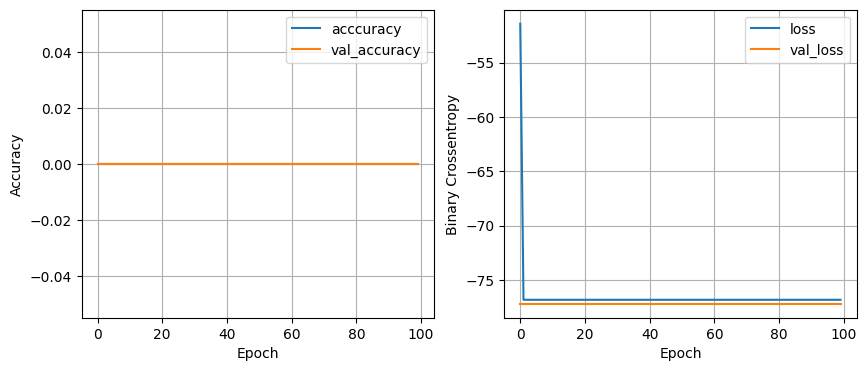

nodes: 16, dropout: 0.01, learning rate: 0.02, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


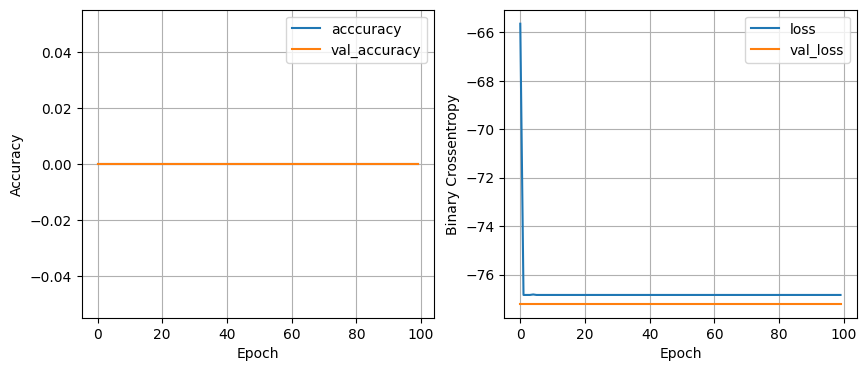

nodes: 16, dropout: 0.01, learning rate: 0.02, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


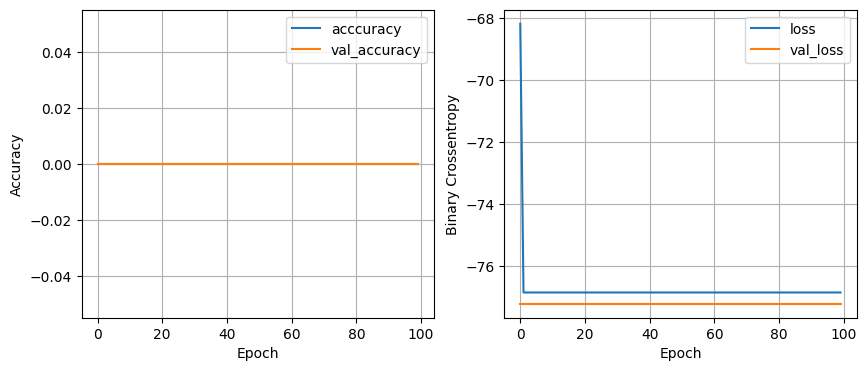

nodes: 16, dropout: 0.01, learning rate: 0.02, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -76.3876 


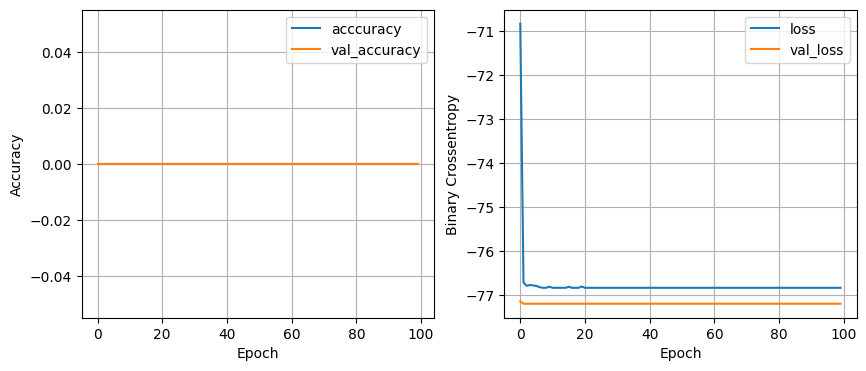

nodes: 16, dropout: 0.01, learning rate: 0.002, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


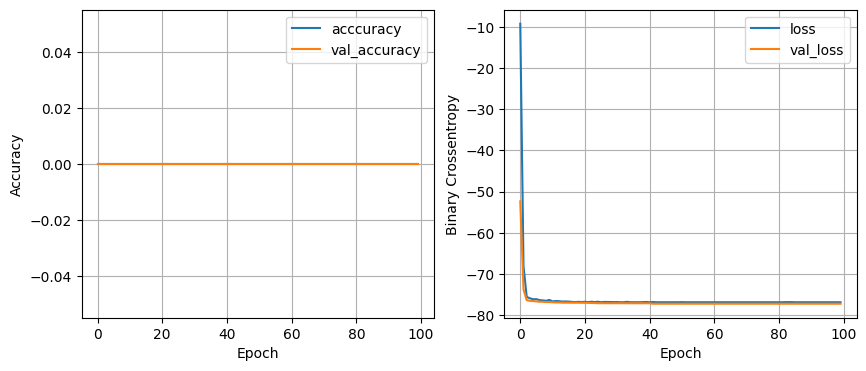

nodes: 16, dropout: 0.01, learning rate: 0.002, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


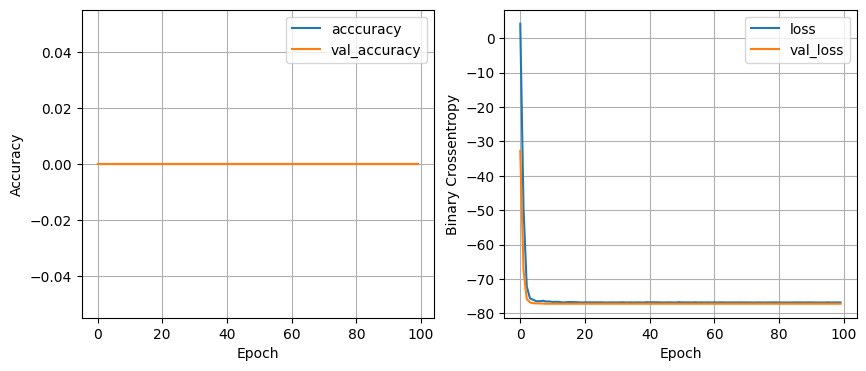

nodes: 16, dropout: 0.01, learning rate: 0.002, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


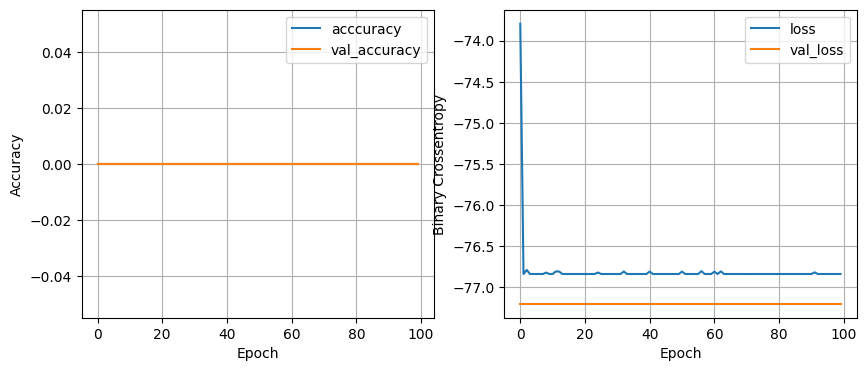

nodes: 16, dropout: 0.2, learning rate: 0.02, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


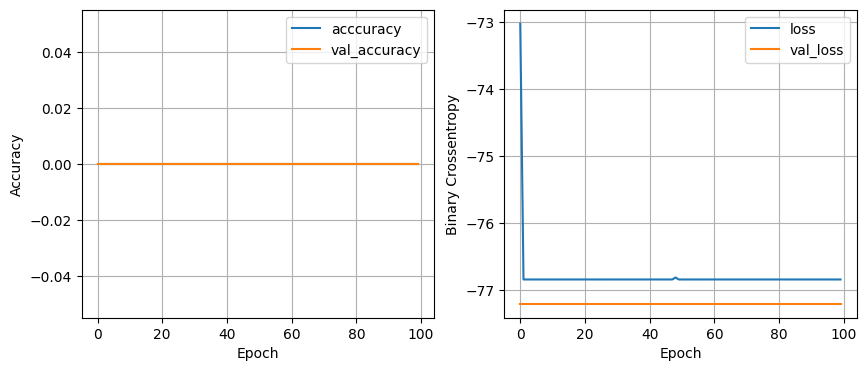

nodes: 16, dropout: 0.2, learning rate: 0.02, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


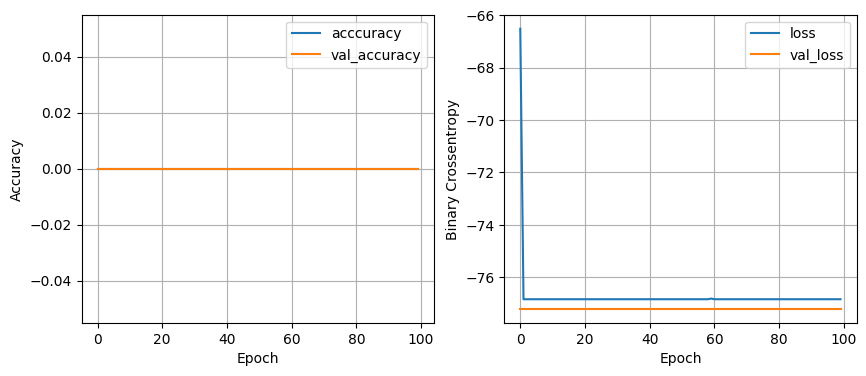

nodes: 16, dropout: 0.2, learning rate: 0.02, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -76.3876 


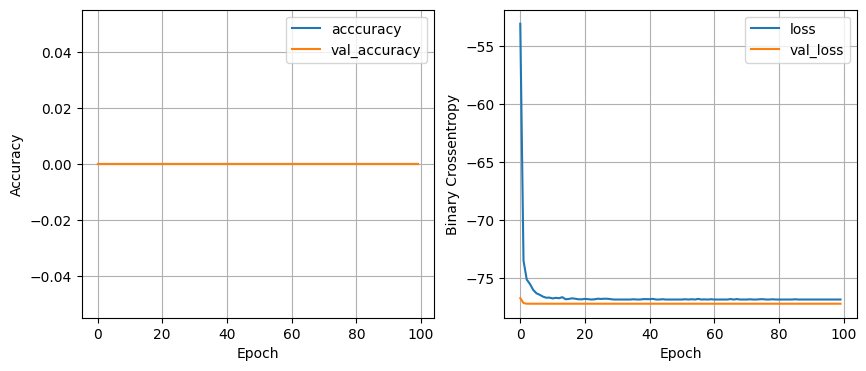

nodes: 16, dropout: 0.2, learning rate: 0.002, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


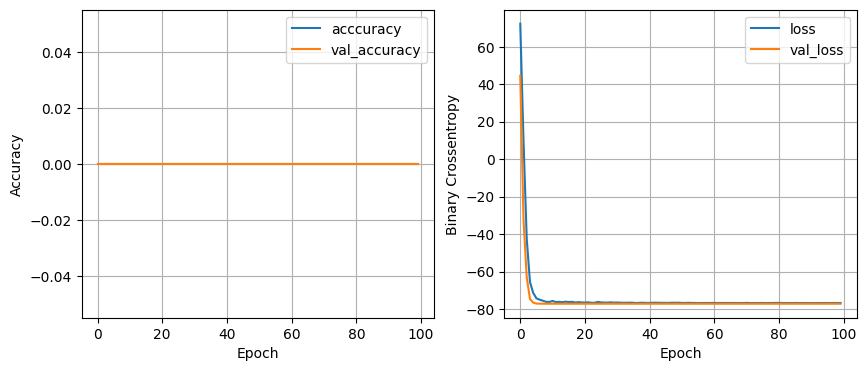

nodes: 16, dropout: 0.2, learning rate: 0.002, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


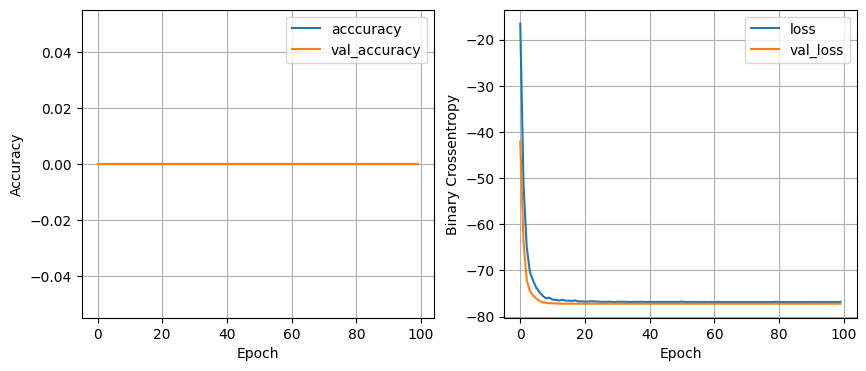

nodes: 16, dropout: 0.2, learning rate: 0.002, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


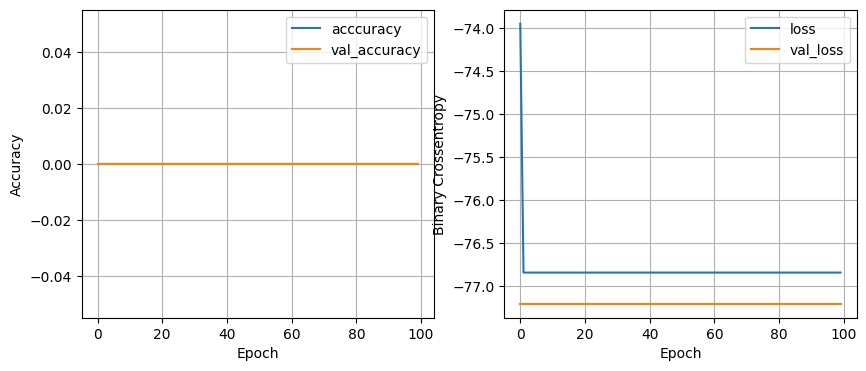

nodes: 32, dropout: 0.01, learning rate: 0.02, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


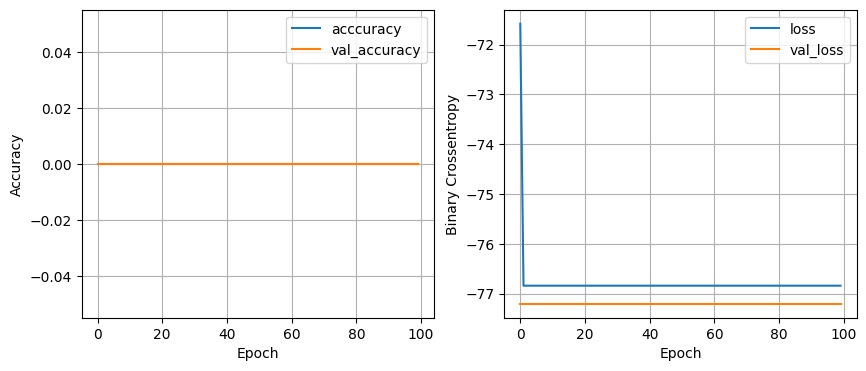

nodes: 32, dropout: 0.01, learning rate: 0.02, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


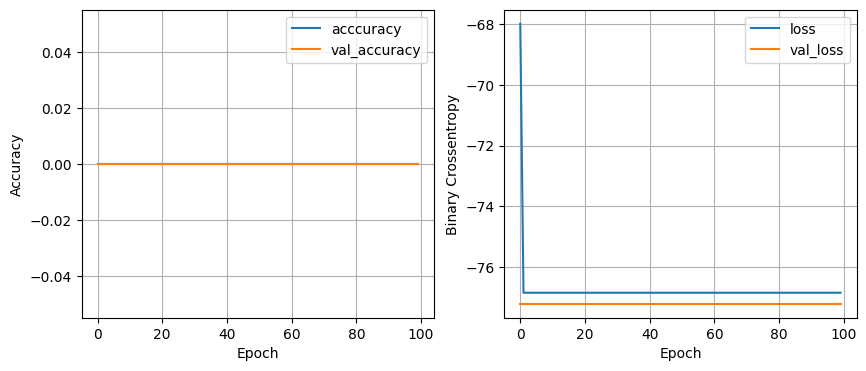

nodes: 32, dropout: 0.01, learning rate: 0.02, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


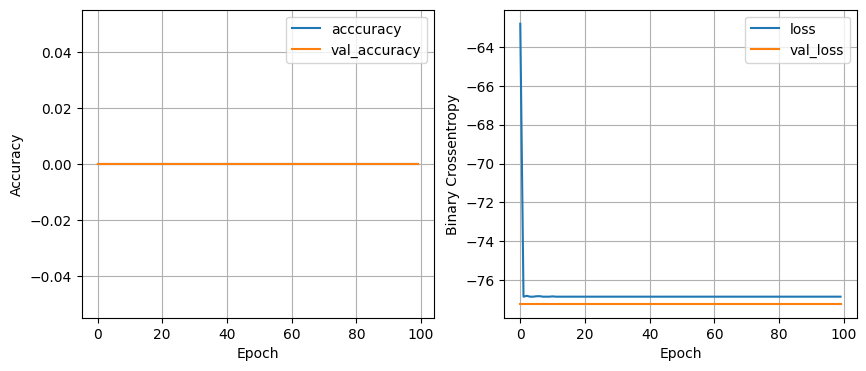

nodes: 32, dropout: 0.01, learning rate: 0.002, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


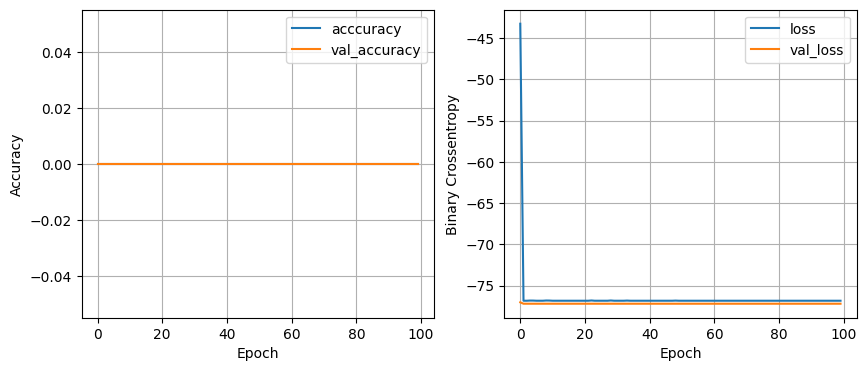

nodes: 32, dropout: 0.01, learning rate: 0.002, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


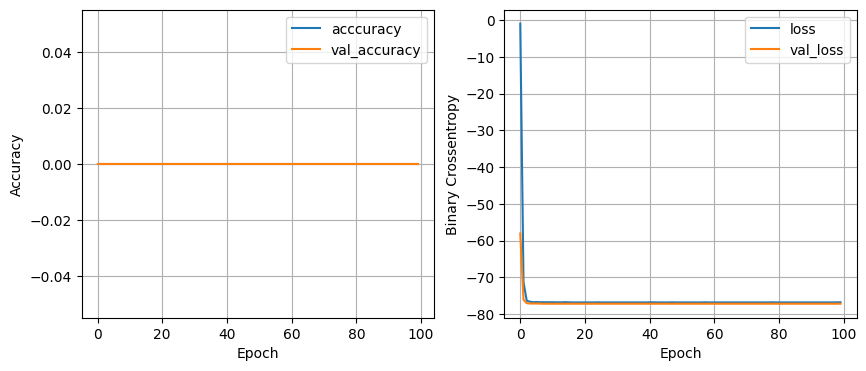

nodes: 32, dropout: 0.01, learning rate: 0.002, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


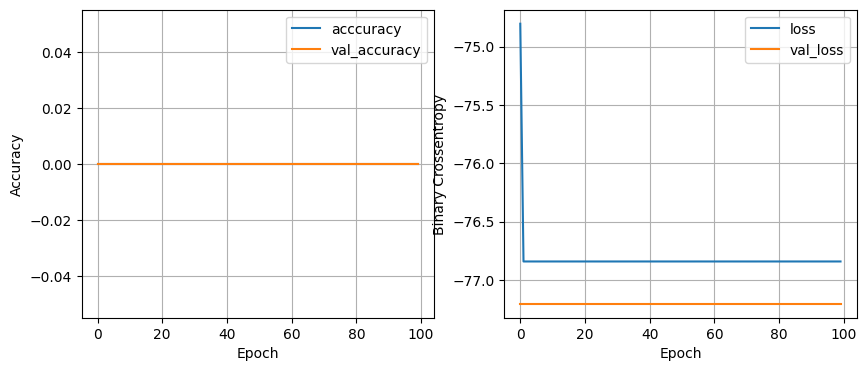

nodes: 32, dropout: 0.2, learning rate: 0.02, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


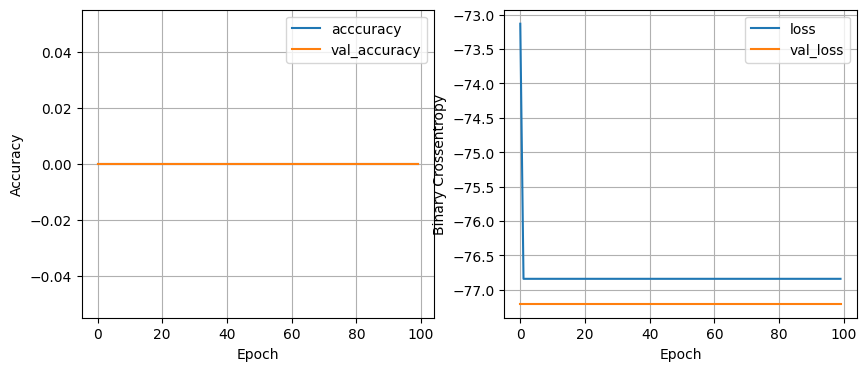

nodes: 32, dropout: 0.2, learning rate: 0.02, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


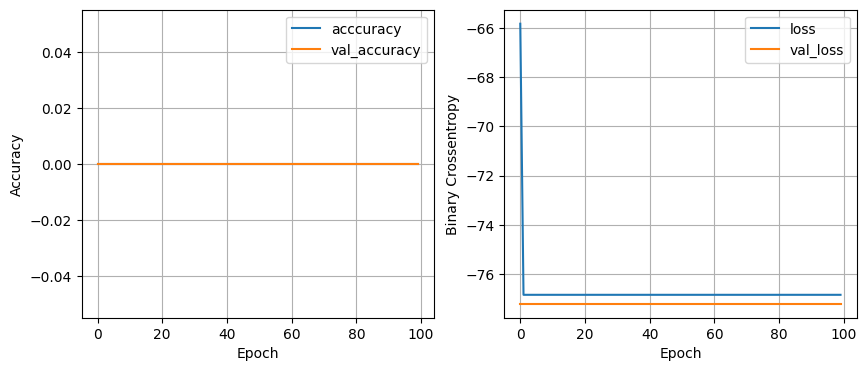

nodes: 32, dropout: 0.2, learning rate: 0.02, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


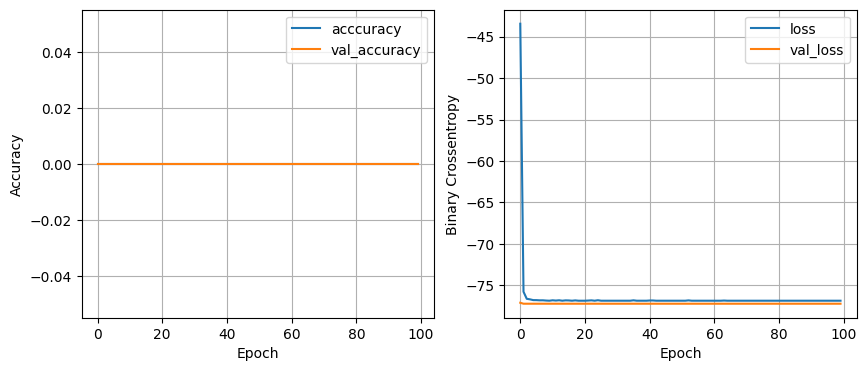

nodes: 32, dropout: 0.2, learning rate: 0.002, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


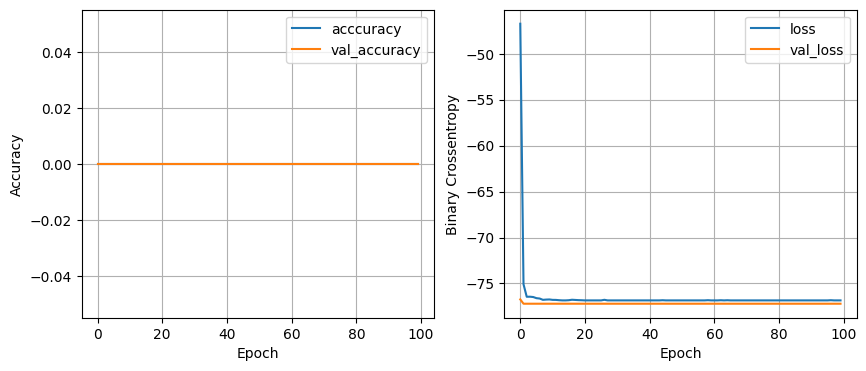

nodes: 32, dropout: 0.2, learning rate: 0.002, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


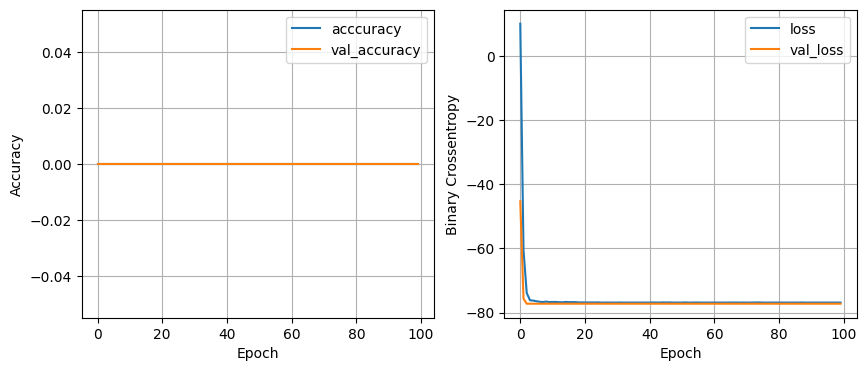

nodes: 32, dropout: 0.2, learning rate: 0.002, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


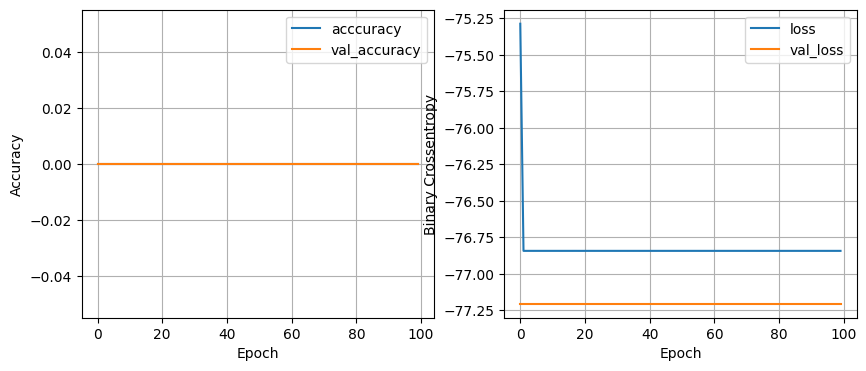

nodes: 64, dropout: 0.01, learning rate: 0.02, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


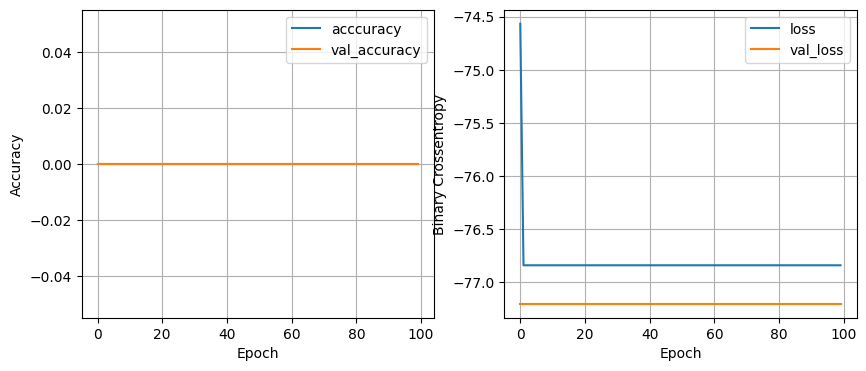

nodes: 64, dropout: 0.01, learning rate: 0.02, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


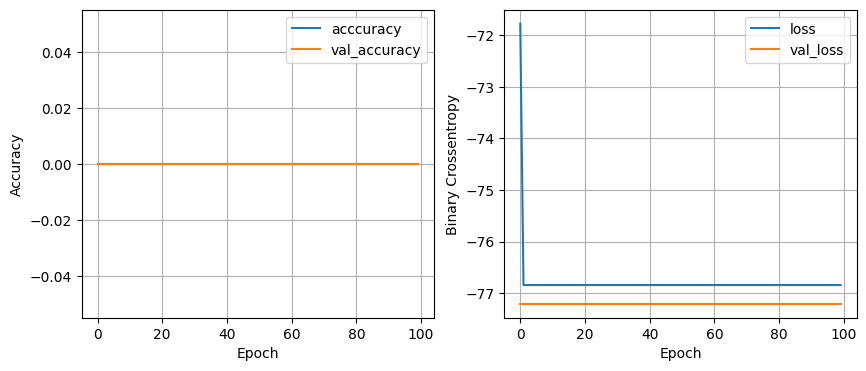

nodes: 64, dropout: 0.01, learning rate: 0.02, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


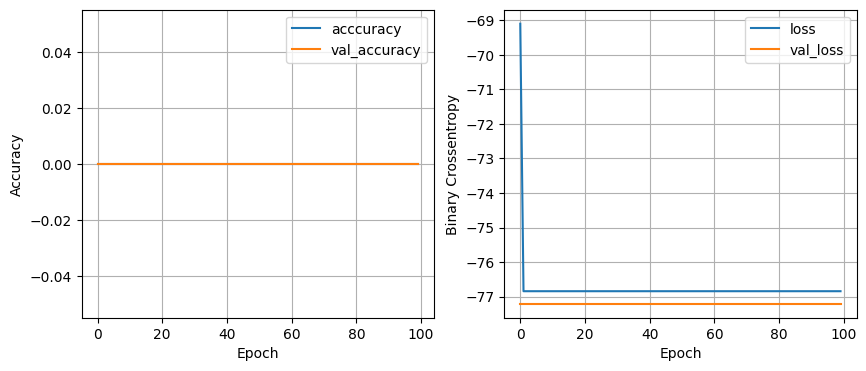

nodes: 64, dropout: 0.01, learning rate: 0.002, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


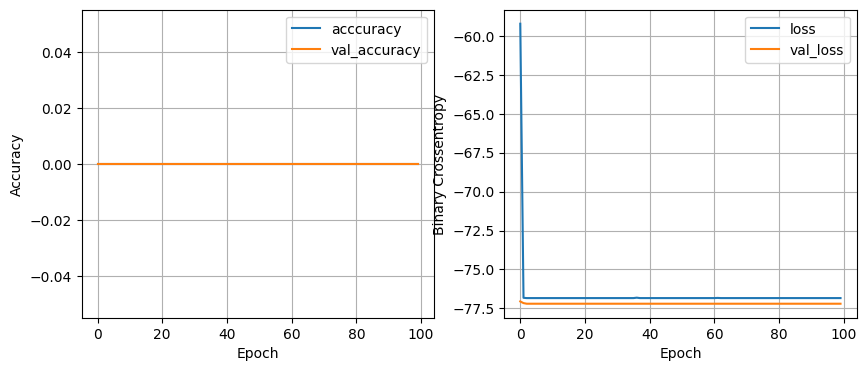

nodes: 64, dropout: 0.01, learning rate: 0.002, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


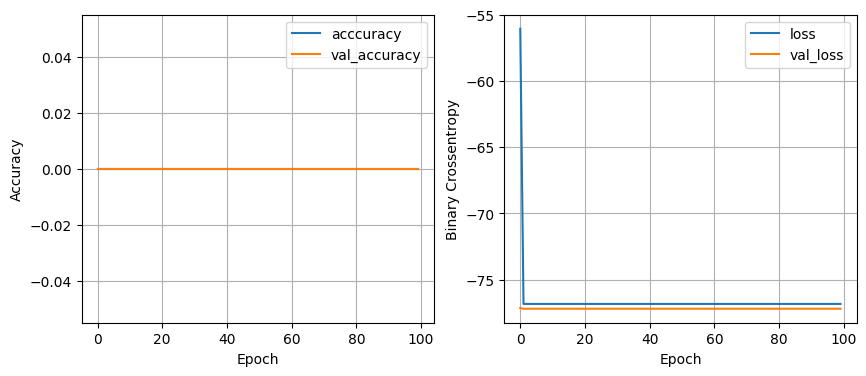

nodes: 64, dropout: 0.01, learning rate: 0.002, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


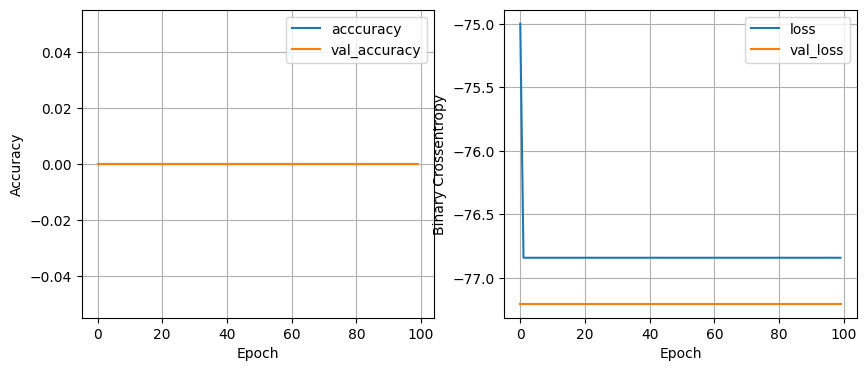

nodes: 64, dropout: 0.2, learning rate: 0.02, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


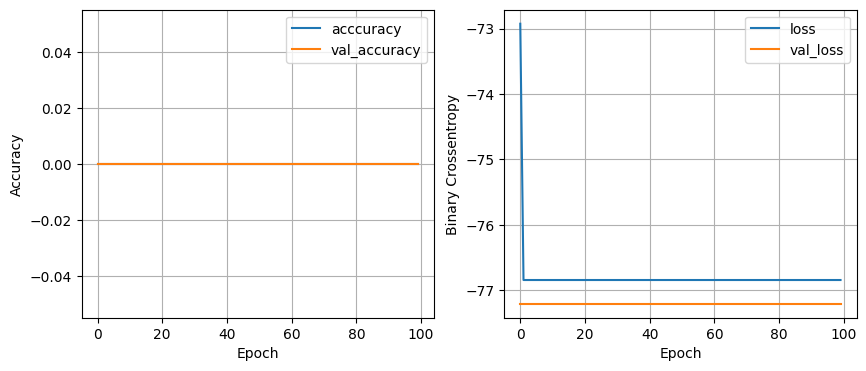

nodes: 64, dropout: 0.2, learning rate: 0.02, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


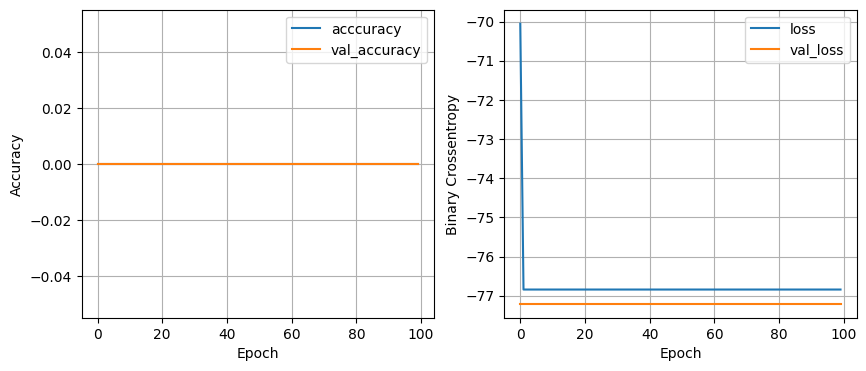

nodes: 64, dropout: 0.2, learning rate: 0.02, batch size: 128
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.3876


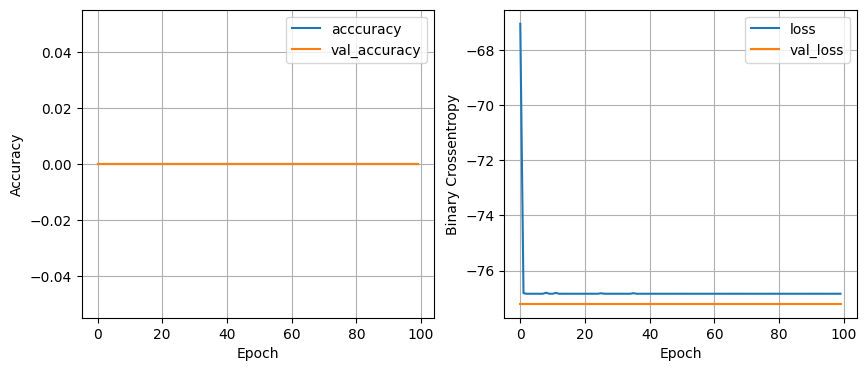

nodes: 64, dropout: 0.2, learning rate: 0.002, batch size: 32
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -76.4002 


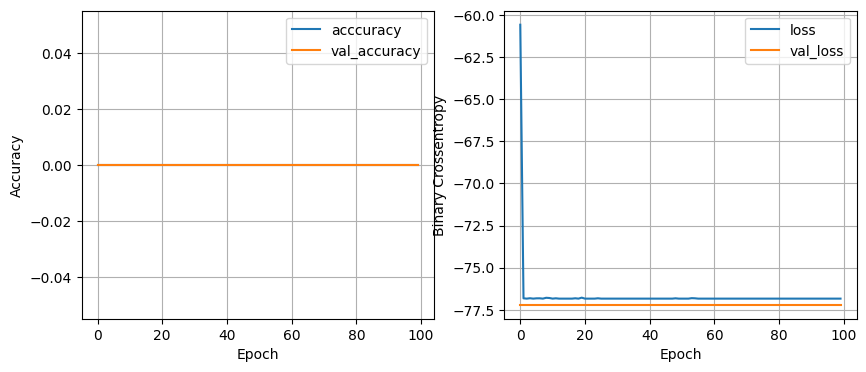

nodes: 64, dropout: 0.2, learning rate: 0.002, batch size: 64
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -76.4630 


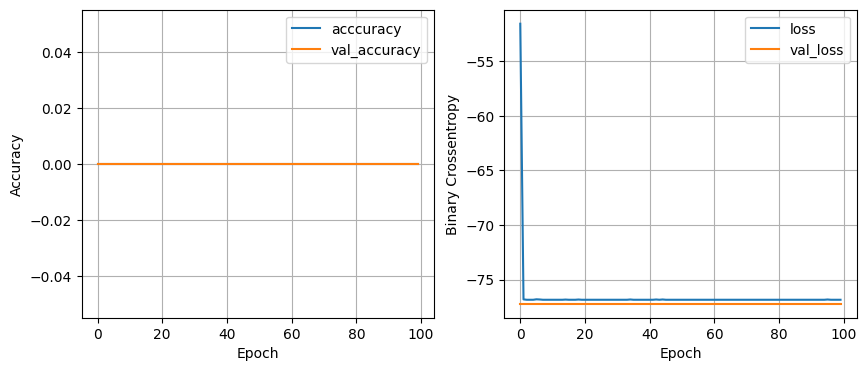

nodes: 64, dropout: 0.2, learning rate: 0.002, batch size: 128


In [16]:
epochs = 100
validation_split = 0.3
# verbose is either [0, 1, 2]
verbose = 0

min_loss_model = None
min_val_loss = float('inf')

for num_nodes in [16, 32, 64]:
  for drop_prob in [0.01, 0.2]:
    for learning_rate in [0.02, 0.002]:
      for batch_size in [32, 64, 128]:
        model, hist = trainModel(
            X_train, y_train, num_nodes, drop_prob, learning_rate, batch_size, epochs, validation_split, verbose
        )
        val_loss = model.evaluate(X_val, y_val, batch_size=batch_size)[0]
        if val_loss < min_val_loss:
          min_val_loss = val_loss
          min_loss_model = model
        plt_history(hist)
        print(f"nodes: {num_nodes}, dropout: {drop_prob}, learning rate: {learning_rate}, batch size: {batch_size}")

In [17]:
y_pred = min_loss_model.predict(X_test).reshape(-1,)
y_pred = (y_pred > 0.5).astype(int)
print(class_report(y_test, y_pred))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       5.0
           4       0.00      0.00      0.00      49.0
           5       0.00      0.00      0.00     427.0
           6       0.00      0.00      0.00     575.0
           7       0.00      0.00      0.00     214.0
           8       0.00      0.00      0.00      30.0

    accuracy                           0.00    1300.0
   macro avg       0.00      0.00      0.00    1300.0
weighted avg       0.00      0.00      0.00    1300.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.